In [8]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import scipy.stats as stats
import statsmodels.formula.api as smf

In [9]:
games=pd.read_csv("gamesdataset.csv", encoding="latin1")
games.category=games.category.astype(str)

In [10]:
twothousands=games[games.year > 2000]
twothousands.year=twothousands.year.astype(int)
twencent=games[(games.year < 2000) & (games.year > 1900)]

C:\Users\test\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
category_db=games.category.str.split(',', expand=True)
category_db.stack().value_counts()
category_db=pd.concat([category_db, games["year"], games["average"], games["geekscore"]], axis=1, join="inner")


# How have games changed between the 20th century and the 2000s?

More games were produced in the 2000s than in the 20th century. One outgrowth of that is that the distribution of categories of games is significantly different.

In [12]:
category_db_twencent=twencent.category.str.split(',', expand=True)
twencat=category_db_twencent.stack().value_counts()
category_db_twothousands=twothousands.category.str.split(',', expand=True)
category_db_twothousands=category_db_twothousands.replace("nan", np.nan)
twothoucat=category_db_twothousands.stack().value_counts()  #making value counts based on twencent and twothousands dataframes
stats.ttest_ind(twothoucat, twencat)

Ttest_indResult(statistic=3.1488279161596613, pvalue=0.0019442184816326335)

So what this t test suggests is that part of the shift during the 2000s is a change in the distribution of categories and values, as there is a significant statistical difference between the two. 

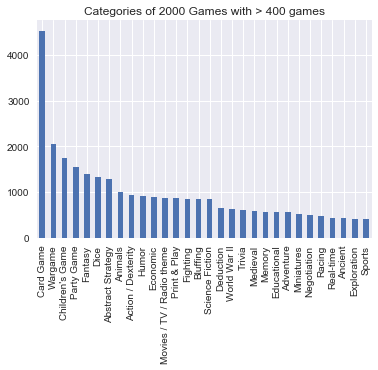

In [13]:
twothoupop=twothoucat[twothoucat > 400]
twothoupop.plot(kind="bar")
plt.title("Categories of 2000 Games with > 400 games")

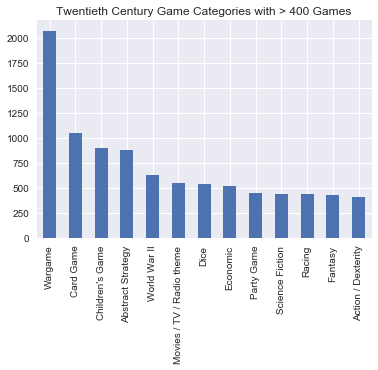

In [14]:
twencatpop=twencat[twencat > 400]
twencatpop.plot(kind="bar")
plt.title("Twentieth Century Game Categories with > 400 Games")

Note that there are far fewer categories with over 400 games in twentieth century games than there are in games from the 2000s. Wargames are the most twentieth century games (twice as many as card games), whereas card games in the 2000s are double war games (there is some overlap, surely, but the raw numbers are significant. 

37

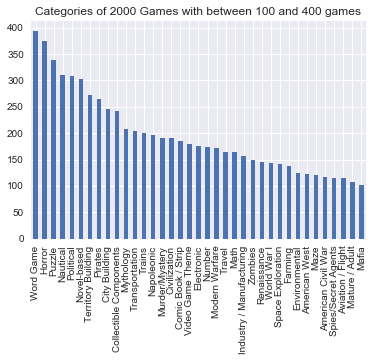

In [15]:
twothoumid=twothoucat[(twothoucat < 400) & (twothoucat > 100)]
twothoumid.plot(kind="bar")
plt.title("Categories of 2000 Games with between 100 and 400 games")
len(twothoumid)

31

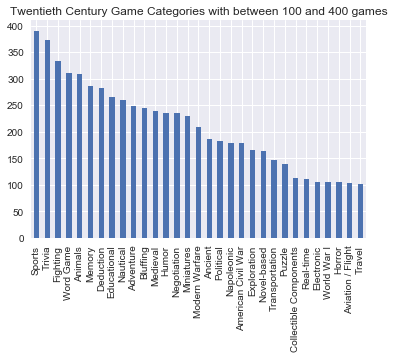

In [16]:
twencatmid=twencat[(twencat < 400) & (twencat > 100)]
twencatmid.plot(kind="bar")
plt.title("Twentieth Century Game Categories with between 100 and 400 games")
len(twencatmid)

Note that many of the categories in the second graph are represented in the > 400 graph. There are also less categories in the twentieth century graph than in the two thousands graph. Whole new categories are found in the 2000s, such as Pirates, Trains, Space Exploration, and Farming, which do not exist in the earlier graph. So part of the transition was a change in the types of games that were produced, and perhaps a bit suggestively, a move towards a more wider audienence for games, which came with both more general production (i.e. card games, party games), but also more specialized niche games.

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


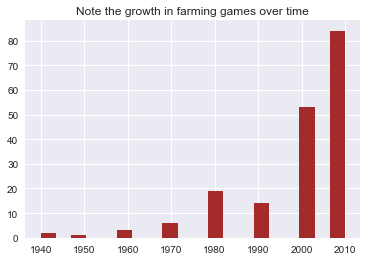

In [17]:
games.category=games.category.astype(str)
farming=games[games.category.str.contains("Farming")]
farming["decade"]=farming.year//10*10
farming=farming[farming.decade > 1900.0]
farming.decade.hist(bins=20, color="Brown")
plt.title("Note the growth in farming games over time") #this is just an example section, and it's a way to confirm my asssumption that the categories of games changed

# Did the Mechanics of Games Change in the 2000s?

In [18]:
mech_twencent=twencent.mechanic.str.split(',', expand=True)
twenmech=mech_twencent.stack().value_counts()
mech_twothousands=twothousands.mechanic.str.split(',', expand=True)
twothoumech=mech_twothousands.stack().value_counts()  #making value counts based on twencent and twothousands dataframes
stats.ttest_ind(twothoumech, twenmech)

Ttest_indResult(statistic=3.6331637310594926, pvalue=0.00044399804281258277)

Based on this t test, there seems to be a highly significant change in the distribution of mechanics. 

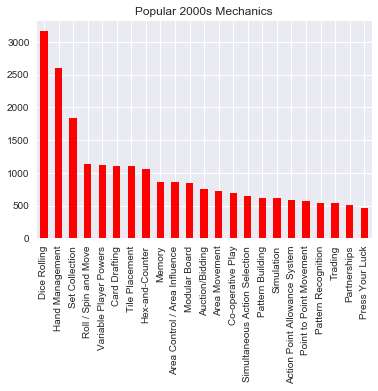

In [33]:
twothoumechpop=twothoumech[twothoumech > 400]
twothoumechpop.plot(kind="bar", color="red")
plt.title("Popular 2000s Mechanics")

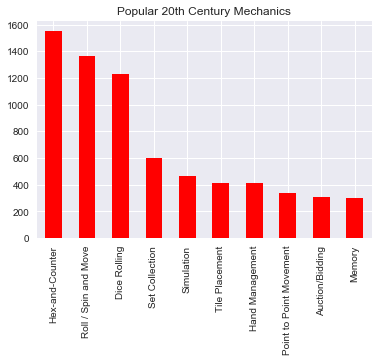

In [35]:
twenmechpop=twenmech[twenmech > 300]
twenmechpop.plot(kind="bar", color="red")
plt.title("Popular 20th Century Mechanics")

Note the heavy emphasis on hex-and-counter games in the twentieth century (most closely associated with wargames), whereas there is much more diversity of game mechanics in the 2000s. As suggested above, one of the changes in the 2000s was a broader audience for games, which would be born out by this evidence.

In [41]:
publisher_db=games.publisher.str.split(',', expand=True)
publisher_db=publisher_db.replace([" Inc.", "(Web published)", "(Self-Published)", " LLC", " Ltd."], np.nan)
publisher_db.unstack().value_counts()

Hasbro                            682
Parker Brothers                   676
Milton Bradley                    640
Ravensburger Spieleverlag GmbH    635
KOSMOS                            373
Decision Games (I)                373
HABA - Habermaaß GmbH             357
(Public Domain)                   349
AMIGO Spiel + Freizeit GmbH       323
Mattel                            316
Schmidt Spiele                    302
 Inc.)                            297
SPI (Simulations Publications     297
Piatnik                           280
Rio Grande Games                  277
Asmodee                           243
999 Games                         239
Pressman Toy Corp.                231
Jumbo                             227
(Unknown)                         223
Avalon Hill                       201
Waddington's Games                201
Tactic                            196
USAopoly                          192
University Games                  184
GMT Games                         181
Alga        

# Have Games Gotten Better? 

In [21]:
games.year=games.year.astype(float)
twencent=games[(games.year > 1930) & (games.year <2000)]

In [22]:
twencent.geekscore=twencent.geekscore.replace(0, np.nan)
twothousands.geekscore=twothousands.geekscore.replace(0, np.nan)

C:\Users\test\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


C:\Users\test\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


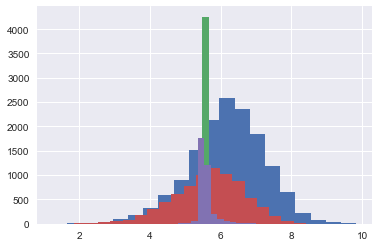

In [23]:
twothousands.average.hist(bins=20)
twothousands.geekscore.hist(bins=20)
twencent.average.hist(bins=20)
twencent.geekscore.hist(bins=20)
plt.legend()

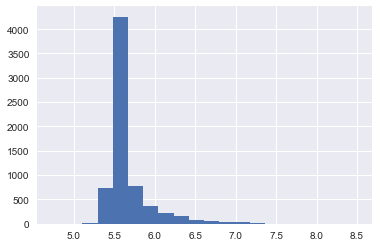

In [24]:
twothousands.geekscore.hist(bins=20)

In [25]:
print(stats.ttest_ind(twothousands.average, twencent.average))

Ttest_indResult(statistic=34.882802256380444, pvalue=1.1041829401430259e-259)


The average rating of games has increased dramatically post 2000, as is shown by the highly significant t statistic comparing the twentieth century average and the 2000s average. One aspect of this is that more and better games are being produced, as is illustrated in the chart above. The geekscores have trended up, but not in a statistically significant way. Indeed, the geekscore for the games of the twentieth century is only slightly lower than that of the 2000s. One way to interpret this change is that there is more involvement in games, and thus more purchasing and more rating of games in the 2000s. 

In [26]:
cats=category_db.loc[:,0]
cats=list(set(cats))
cats=cats[1:]

In [27]:
games.category

0             Action / Dexterity,Bluffing,Dice,Math,Racing
1                                                  Fantasy
2                                         Card Game,Number
3                                Bluffing,Card Game,Number
4                                                   Sports
5                            Adventure,Deduction,Mythology
6                                           Card Game,Dice
7                                                Card Game
8                                                      nan
9                                 Dice,Number,Print & Play
10                             Abstract Strategy,Card Game
11                                               Card Game
12                  Aviation / Flight,Wargame,World War II
13                  Aviation / Flight,Wargame,World War II
14                                               Card Game
15       Abstract Strategy,Animals,City Building,Econom...
16                                               Card Ga

In [28]:
categorydf=pd.concat([games["category"],games["average"], games["geekscore"], games["year"]], axis=1)
d={}
for i in cats:
    d[i]=categorydf[categorydf.category.str.contains(i)]

## Average Players

In [29]:
games['avgplayers']=(games["minplayers"]+games["maxplayers"])/2 #creates an average player category
games.avgplayers=games.avgplayers.astype(float)
avg=games[games.avgplayers < 8]
avg.average=avg.average.round()
observed=[avg.average, avg.avgplayers]
expected=stats.contingency.expected_freq([avg.average, avg.avgplayers])
pd.crosstab(avg.average, avg.avgplayers)
x,y=stats.chisquare(observed,expected)

C:\Users\test\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [30]:
avg.geekscore=avg.geekscore.replace(0, np.nan)
avg.geekscore=avg.geekscore.round()
pd.crosstab(avg.avgplayers, avg.geekscore)

C:\Users\test\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


geekscore,3.0,4.0,5.0,6.0,7.0,8.0
avgplayers,,,,,,
0.0,0,0,9,34,0,0
0.5,0,0,5,7,0,0
1.0,0,0,19,175,2,0
1.5,0,0,32,293,4,0
2.0,0,2,337,1855,43,1
2.5,0,0,65,324,16,2
3.0,0,2,703,1853,79,6
3.5,0,1,188,947,40,3
4.0,1,2,535,1312,43,1


In [31]:
games.minage=games.minage.astype(float)
minagegames=games[(games.minage > 5) & (games.minage <16)]
minagegames.average=minagegames.average.round()
pd.crosstab(minagegames.minage, minagegames.average)

C:\Users\test\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


average,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
minage,,,,,,,,,,
6.0,1,5,25,161,391,564,208,31,4,0
7.0,0,4,19,124,338,445,143,21,1,0
8.0,2,9,71,436,1180,1960,889,161,14,1
9.0,0,2,4,37,95,173,65,20,3,0
10.0,0,10,47,235,747,1673,1071,235,14,1
11.0,0,0,1,6,19,28,29,9,0,0
12.0,2,7,48,188,661,1913,1668,459,27,2
13.0,0,2,3,30,82,234,285,139,19,1
14.0,0,2,4,20,67,233,314,158,25,1


In [32]:
minagegames=minagegames[minagegames.geekscore > 0]
minagegames.geekscore=minagegames.geekscore.round()
pd.crosstab(minagegames.minage, minagegames.geekscore)

geekscore,4.0,5.0,6.0,7.0,8.0
minage,,,,,
6.0,1,173,327,2,0
7.0,0,182,265,1,0
8.0,1,650,1606,30,3
9.0,0,51,142,5,0
10.0,0,403,1673,53,0
11.0,0,17,33,4,0
12.0,0,380,2223,98,3
13.0,0,53,350,22,2
14.0,0,32,389,28,5


# Regression Analysis of Ownership, Users, Etc.